## King County Housing Sales

- Student name: Olaide Kashimawo
- Student pace: Self Paced
- Scheduled project review date/time: 
- Instructor name:Morgan Jones
- Blog post URL: TBD

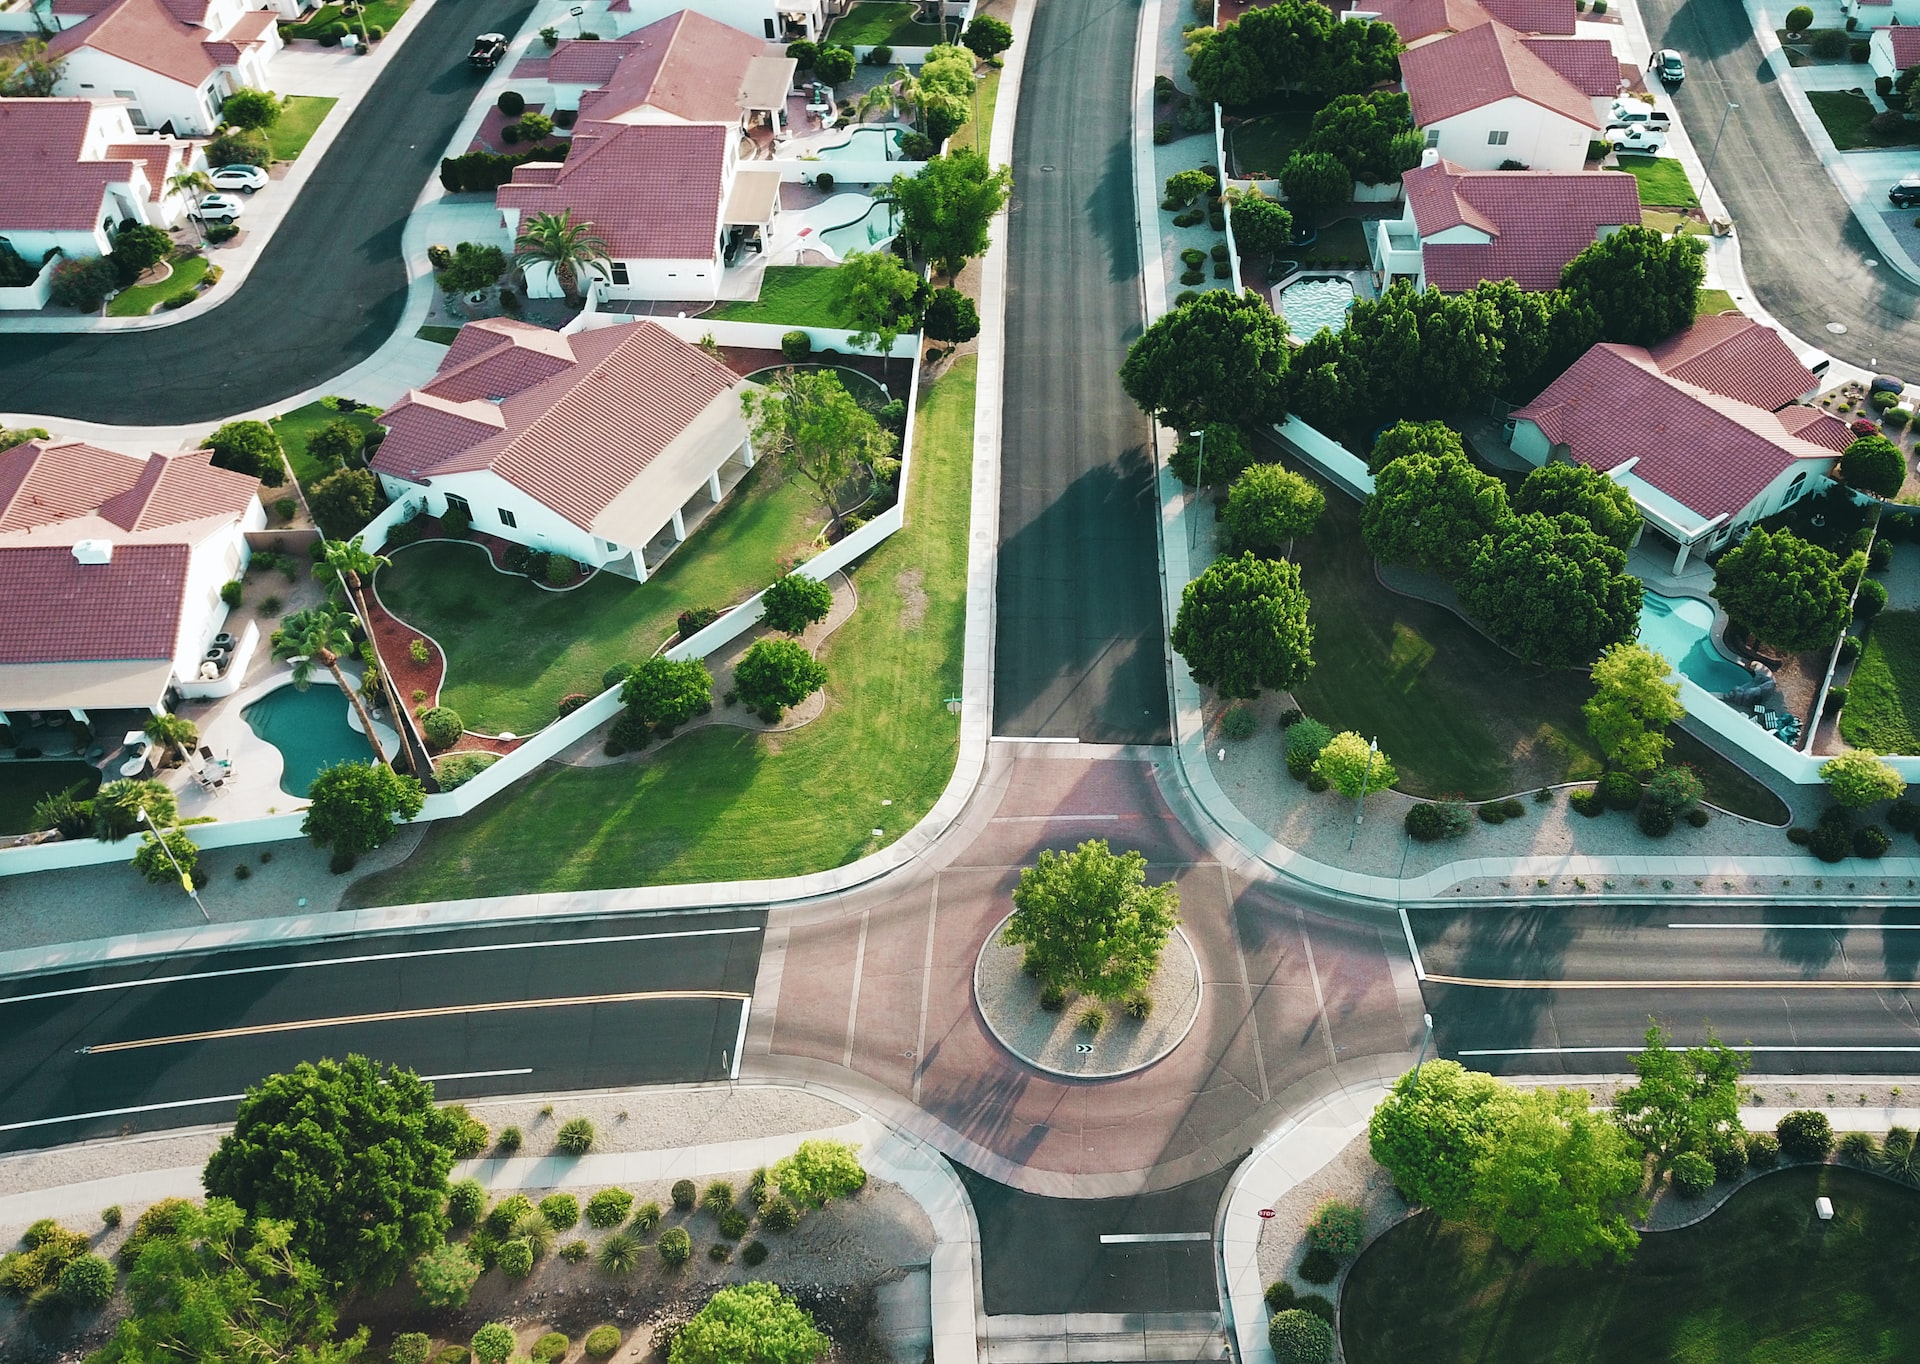

### OVERVIEW

This dataset comprises the prices of homes that were sold in King County, which is where Seattle is located. It encompasses houses that were purchased between May 2014 and May 2015.

**id**:  a notation for a house

**date**: Date house was sold

**price**: Price is prediction target

**bedrooms**: Number of Bedrooms/House

**bathrooms**: Number of bathrooms/bedrooms

**sqft_living**: square footage of the home

**sqft_lot**: square footage of the lot

**floors**: Total floors (levels) in house

**waterfront**: House which has a view to a waterfront

**view**: Houses that has been viewed

**condition** :How good the condition is Overall

**grade**: overall grade given to the housing unit, based on King County grading system

**sqft_above**:square footage of house apart from basement

**sqft_basement**: square footage of the basement

**yr_built** :Built Year

**yr_renovated** :Year when house was renovated

**zipcode**:zip code

**lat**: Latitude coordinate

**long**: Longitude coordinate

**sqft_living15** :Living room area in 2015 (means-- some renovations) 

**sqft_lot15** :Lotsize area in 2015 (means -- some renovations)

### BUSINESS UNDERSTANDING


To identify the variables affecting house prices, e.g area, number of rooms,bathrooms  and to create a linear model that quantitatively relates house prices with variables such as number of rooms, area and number of bathrooms

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import datetime as dt
import folium
import warnings
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
style.use('ggplot')

plt.style.use('seaborn')
sns.set_theme()
%matplotlib inline


In [2]:
pd.set_option('display.max_column',21)

### DATA LOAD

In [3]:
#Load data into notebook
H_Sales = pd.read_csv("data/kc_house_data.csv")


In [4]:
H_Sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
H_Sales.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
#checking the shape
H_Sales.shape

(21613, 21)

In [7]:
#checking the info to Display the data types of each Column (21 columns)
H_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
#To suppress the scientific notation in price
pd.set_option('display.float_format', lambda x: '%.5f'%x)

### Generate descriptive statistics
Lets summarize the central tendency, dispersion and shape of a dataset's distribution

In [9]:
H_Sales.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.00000,4580301520.86499,2876565571.31206,1000102.00000,2123049194.00000,3904930410.00000,7308900445.00000,9900000190.00000
price,21613.00000,540088.14177,367127.19648,75000.00000,321950.00000,450000.00000,645000.00000,7700000.00000
bedrooms,21613.00000,3.37084,0.93006,0.00000,3.00000,3.00000,4.00000,33.00000
bathrooms,21613.00000,2.11476,0.77016,0.00000,1.75000,2.25000,2.50000,8.00000
sqft_living,21613.00000,2079.89974,918.44090,290.00000,1427.00000,1910.00000,2550.00000,13540.00000
sqft_lot,21613.00000,15106.96757,41420.51152,520.00000,5040.00000,7618.00000,10688.00000,1651359.00000
floors,21613.00000,1.49431,0.53999,1.00000,1.00000,1.50000,2.00000,3.50000
waterfront,21613.00000,0.00754,0.08652,0.00000,0.00000,0.00000,0.00000,1.00000
view,21613.00000,0.23430,0.76632,0.00000,0.00000,0.00000,0.00000,4.00000
condition,21613.00000,3.40943,0.65074,1.00000,3.00000,3.00000,4.00000,5.00000


### DATA CLEANING
There are 19 house features plus the price and the id columns, along with 21613 observations.

### Categorical vs Continuous Features

In [10]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
H_Sales.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

### Below are the category of the features:

##### Qualitative Features:
- date - Qualitative Features

- Categorical Features:

- floors - Categorical Nominal feature

- waterfront - Categorical Nominal feature

- view - Categorical Ordinal feature

- condition - Categorical Ordinal feature

- grade - Categorical Ordinal feature

- bedrooms - Categorical Nominal feature

- bathrooms - Categorical Nominal feature

##### Quantitative Features:
- all others are Quantitative Features.

### Find and remove null values

In [11]:
#checking and removing null data
H_Sales.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In the dataset, there are no missing values. It is not necessary for missing values to be present in the dataset in the form of NA, NAN, Zeroes, and so on; they could be represented by other values that can be explored by analyzing each feature.

In [12]:
H_Sales.shape

(21613, 21)

In [13]:
#checking for duplicate values
H_Sales.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool

In [14]:
#removing duplicates by checking the IDs
H_Sales.drop_duplicates(subset='id', keep='first', inplace=False, ignore_index=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,6414100192,20141209T000000,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,5631500400,20150225T000000,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,2487200875,20141209T000000,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,1954400510,20150218T000000,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.00000,3,2.50000,1530,1131,3.00000,0,0,3,8,1530,0,2009,0,98103,47.69930,-122.34600,1530,1509
21609,6600060120,20150223T000000,400000.00000,4,2.50000,2310,5813,2.00000,0,0,3,8,2310,0,2014,0,98146,47.51070,-122.36200,1830,7200
21610,1523300141,20140623T000000,402101.00000,2,0.75000,1020,1350,2.00000,0,0,3,7,1020,0,2009,0,98144,47.59440,-122.29900,1020,2007
21611,291310100,20150116T000000,400000.00000,3,2.50000,1600,2388,2.00000,0,0,3,8,1600,0,2004,0,98027,47.53450,-122.06900,1410,1287


In [15]:
#Drop the columns "id" from axis 1

H_Sales = H_Sales.drop(['id', 'zipcode','lat','long'], axis=1)

In [16]:
H_Sales.shape

(21613, 17)

###  Identify outliers using the boxplot 

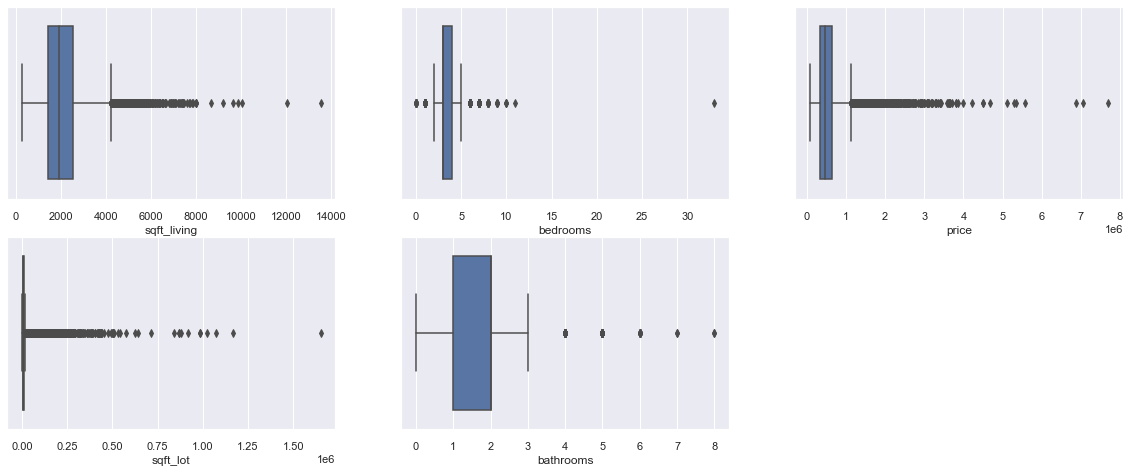

In [17]:
# Identify outliers using the boxplot 
plt.figure(figsize=(20,12))

plt.subplot(331)
sns.boxplot(H_Sales.sqft_living)
plt.subplot(332)
sns.boxplot(H_Sales.bedrooms)
plt.subplot(333)
sns.boxplot(H_Sales.price)
plt.subplot(334)
sns.boxplot(H_Sales.sqft_lot)
plt.subplot(335)
sns.boxplot(H_Sales.bathrooms.astype('int'))
plt.show()

In [18]:
#Create a function to return the outliers
def detect_outliers(x, c = 1.5):
    q1, q3 = np.percentile(x, [25,75])
    #print("q1 - ",q1, " q3 - ", q3)
    
    iqr = (q3 - q1)
    #print("iqr --", iqr)
    
    lob = q1 - (iqr * c)
    #print("lob - ",lob)
    
    uob = q3 + (iqr * c)
    #print("uob - ",uob)
    
    # Generate outliers
    gen = np.where((x > uob) | (x < lob))

    return gen

In [19]:

# Detect all Outliers 
priceOutliers = detect_outliers(H_Sales['price'])
print("Total Outliers count : ",len(priceOutliers[0]))

Total Outliers count :  1146


### Remove_outliers

In [20]:
# Remove outliers
H_Sales = H_Sales.drop(priceOutliers[0])

In [21]:
H_Sales.shape

(20467, 17)

### Checking the price distribution as a target variable.

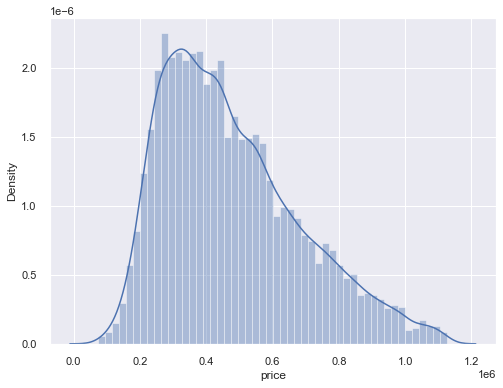

In [22]:
plt.figure(figsize=(8,6))
sns.distplot(H_Sales['price'])
plt.show()

- If the distribution of the target variable is too skewed, predictive modeling will be impossible. Although a bell curve is preferred, a slightly positive or negative skew is acceptable.

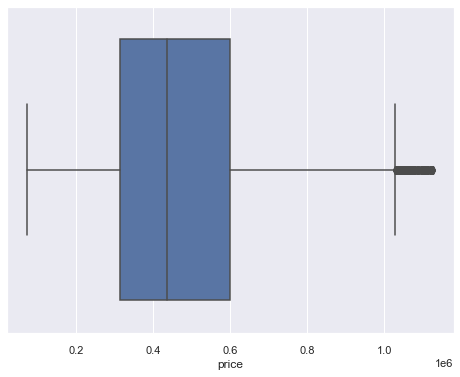

In [23]:
plt.figure(figsize=(8,6))
sns.boxplot(H_Sales['price'])
plt.show()

### EXPLORATORY DATA ANALYSIS

#### Lets find out top 10 features which are highly correlaed with price.

Examining the data's correlation matrix. I'll explain the intended relationship between the variables using the heatmap. 

In [24]:

H_Sales.corr()['price'].sort_values(ascending=False).head(10)

price           1.00000
grade           0.63118
sqft_living     0.62233
sqft_living15   0.56209
sqft_above      0.53045
bathrooms       0.45593
bedrooms        0.29696
floors          0.27399
view            0.23827
sqft_basement   0.23570
Name: price, dtype: float64

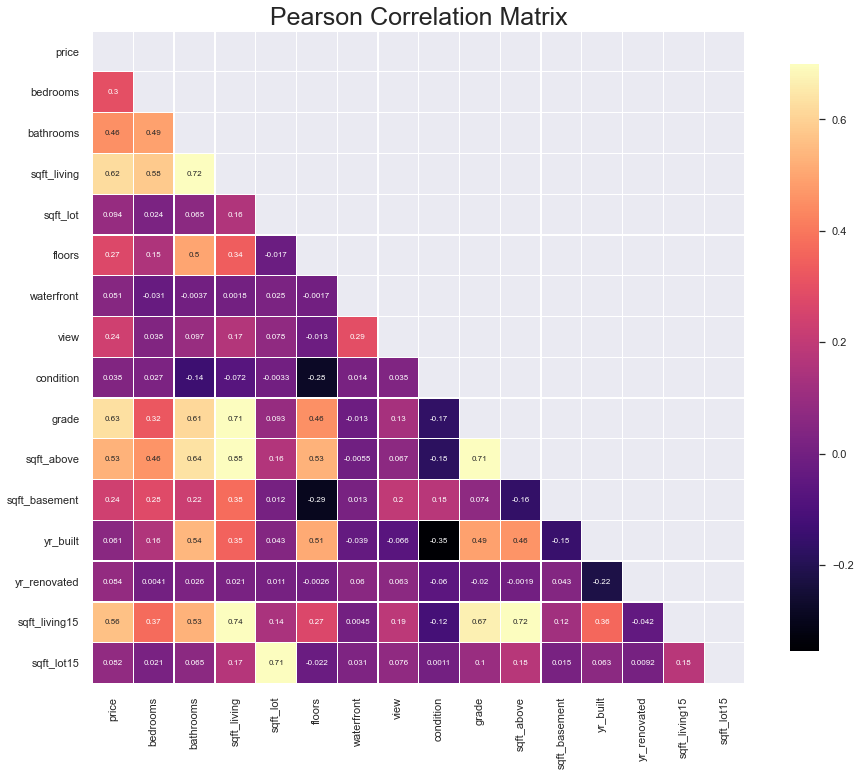

In [25]:
#Creating a correlation plot 
features = ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']

mask = np.zeros_like(H_Sales[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(H_Sales[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="magma",
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

plt.show()

There is a high correlation between sqft_living and price. It seems that there is a positive linear relationship between the two. Going by general trend an increase in living space will lead to increase in price.from this we can see year renovated has tge low correlation.
The dark blue color has correlation of 1 which is the price.
There is a strong relationship between the price (target variable) and the number of bedrooms, bathrooms,sqft_living, floors, waterfront, view, grade, sqft_above, sqft_above and sqft_living15.

### Feature Engineering From Date

In [26]:
H_Sales['date'] = pd.to_datetime(H_Sales['date'])
H_Sales['month'] = H_Sales['date'].dt.month_name().str[:3]
H_Sales['year']=H_Sales['date'].apply(lambda date:date.year)

### Relationships between the Features

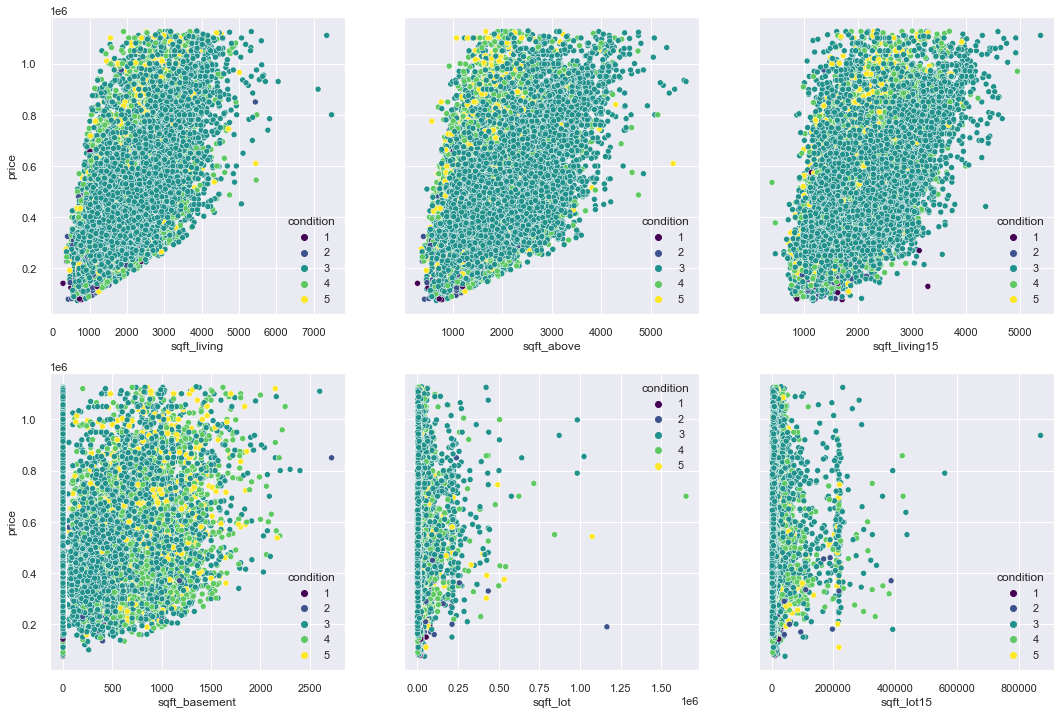

In [27]:
fig, axs = plt.subplots( nrows=2, ncols=3, sharey=True, figsize=(18,12))
sns.scatterplot(y='price',x='sqft_living',data=H_Sales, hue='condition', palette='viridis', ax=axs[0,0])
sns.scatterplot(y='price',x='sqft_above',data=H_Sales, hue='condition', palette='viridis', ax=axs[0,1])
sns.scatterplot(y='price',x='sqft_living15',data=H_Sales, hue='condition', palette='viridis', ax=axs[0,2])
sns.scatterplot(y='price',x='sqft_basement',data=H_Sales, hue='condition', palette='viridis', ax=axs[1,0])
sns.scatterplot(y='price',x='sqft_lot',data=H_Sales, hue='condition', palette='viridis', ax=axs[1,1])
sns.scatterplot(y='price',x='sqft_lot15',data=H_Sales, hue='condition', palette='viridis', ax=axs[1,2])
plt.show()

There appears to be a strong positive correlation between sqft living, sqft above, and sqft living15 and price. This is not the case for sqft basement, sqft lot, and sqft lot15. It is self-evident that larger houses are more expensive. The graphs also show that the majority of houses lack a basement and land space, despite the fact that the price does not increase linearly with larger basement and land space. I discovered that sqft living is the sum of sqft above and sqft basement.

sqft living = sqft above + sqft basement.

### Does the view of the house impact the house prices?

[]

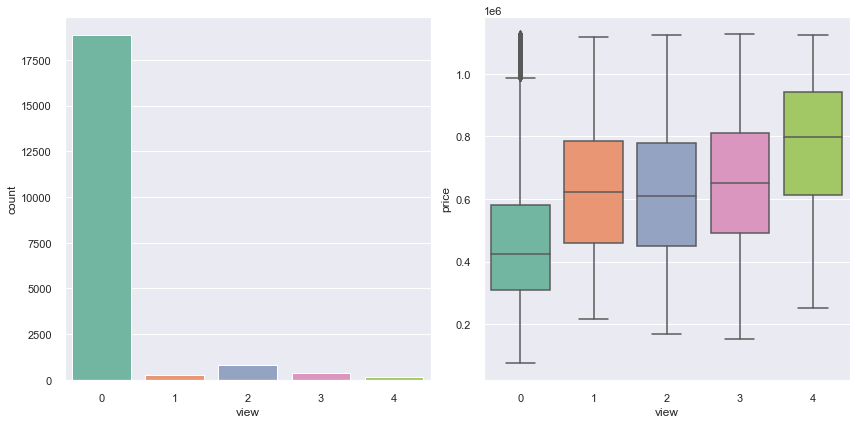

In [28]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

sns.countplot(x='view',data=H_Sales, palette='Set2', ax=axs[0])
sns.boxplot(y='price',x='view',data=H_Sales, palette='Set2', ax=axs[1])

plt.tight_layout()
plt.plot()

The view ranges from 0 to 4, indicating how good the property's view was. The graph above shows that the majority of houses have a good view, which explains why their prices are so low. Few houses have a view index of four, and they are quite pricey.

### Does the Grade have any impact on the house prices ?

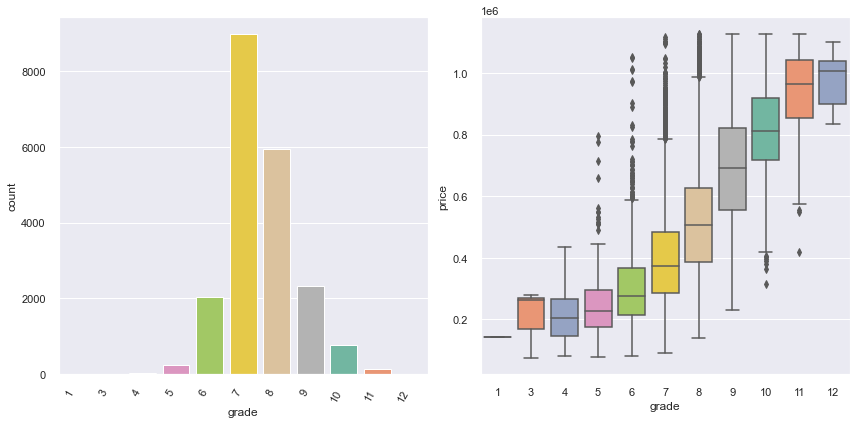

In [29]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

ax = sns.countplot(x='grade',data=H_Sales, palette='Set2', ax=axs[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
sns.boxplot(y='price',x='grade',data=H_Sales, palette='Set2', ax=axs[1])

plt.tight_layout()
plt.show()

### Does the waterfront property have any impact on the house prices ?

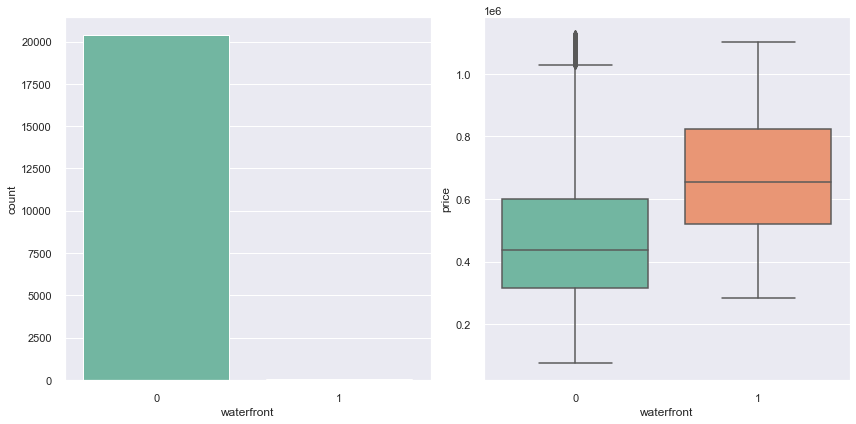

In [30]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

sns.countplot(x='waterfront',data=H_Sales, palette='Set2', ax=axs[0])
sns.boxplot(y='price',x='waterfront',data=H_Sales, palette='Set2', ax=axs[1])

plt.tight_layout()
plt.show()


- Waterfront houses seem to have an impact on prices
- The median price reveals that certain waterfront properties are within reach of the average buyer.
- waterfront - A dummy variable that indicates whether or not the apartment has a view of the water.
- It goes without saying that properties with water views are usually pricey, but they are scarce.

### Does the number of bedrooms impact the house prices?

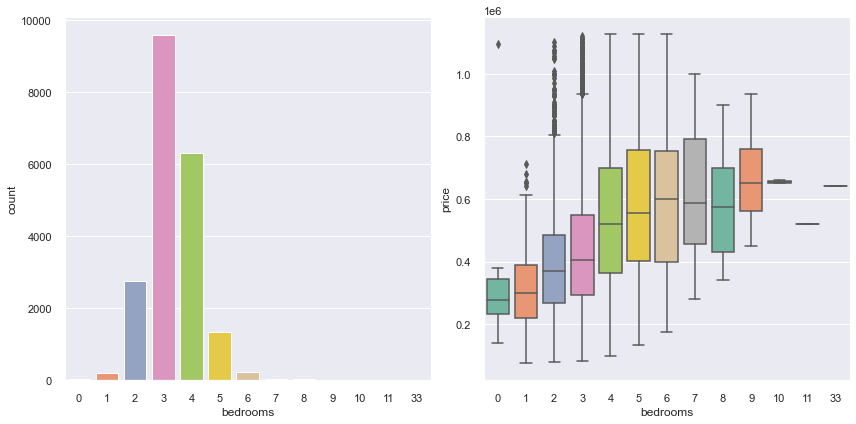

In [31]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

sns.countplot(x='bedrooms',data=H_Sales, palette='Set2',ax=axs[0])
sns.boxplot(y='price',x='bedrooms',data=H_Sales, palette='Set2', ax=axs[1])

plt.tight_layout()
plt.show()

- Majority of these houses are two to five bedrooms, and also with large mansions with 33 beds. But we can't see it because the rest of the bedrooms number in the thousands and this is only one.

- Another graph depicts the price distribution by bedroom. Bedrooms range in size from 3 to 7. That makes sense because, according to our count plot, the majority of the residences had between 3 and 7 bedrooms. As a result, the wide range of prices makes sense.

### Does the number of bathrooms impact the house prices ?

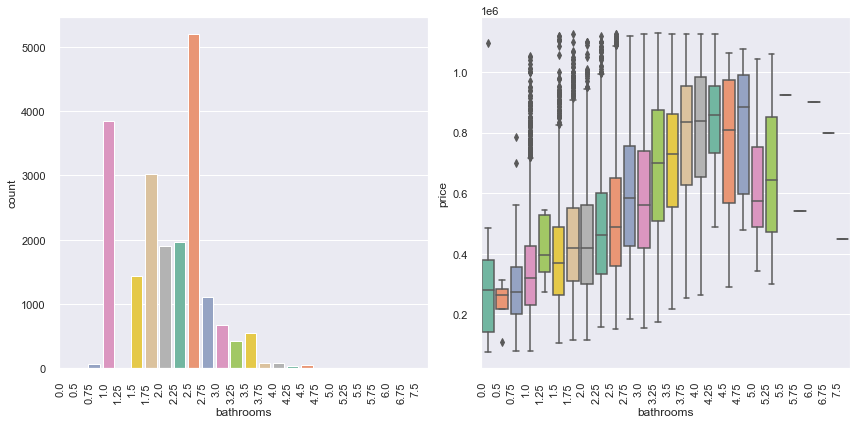

In [32]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

chart1 = sns.countplot(x='bathrooms',data=H_Sales, palette='Set2',ax=axs[0])
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90, horizontalalignment='right')

chart2 = sns.boxplot(y='price',x='bathrooms',data=H_Sales, palette='Set2', ax=axs[1])
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.tight_layout()
plt.show()

- Bathrooms--Most houses have 1 to 4 bathrooms, and their prices are lower than those with more than 4 bathrooms.
- Actually, according to the headmap generated above, 'bathroom' is highly connected with'sqft living,' therefore I believe it is the size of the house, not the number of bathrooms, that makes it pricey.

### Does the number of bathrooms impact the house prices ?

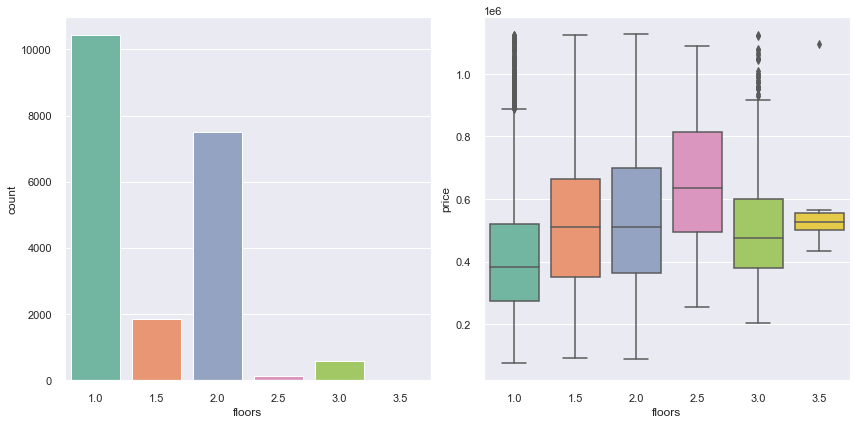

In [33]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

sns.countplot(x='floors',data=H_Sales, palette='Set2',ax=axs[0])
sns.boxplot(y='price',x='floors',data=H_Sales, palette='Set2', ax=axs[1])

plt.tight_layout()
plt.show()

- Large number of properties have only one floor, and only a few have a penthouse. However, this does not imply that high-rise buildings are more costly; other factors such as overall property size could also determine house prices.

In [34]:
H_Sales.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,1340,5650,Oct,2014
1,2014-12-09,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991,1690,7639,Dec,2014
2,2015-02-25,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,2720,8062,Feb,2015
3,2014-12-09,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,1360,5000,Dec,2014
4,2015-02-18,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0,1800,7503,Feb,2015


In [35]:
H_Sales.groupby('month').mean()['price']

month
Apr   496743.60723
Aug   476488.44992
Dec   462681.43082
Feb   455775.55146
Jan   458157.89189
Jul   483486.71039
Jun   490758.80535
Mar   479756.79233
May   481255.15560
Nov   462481.28465
Oct   471639.30795
Sep   473740.91981
Name: price, dtype: float64

<AxesSubplot:title={'center':'\n Months relationship with Price\n'}, xlabel='month'>

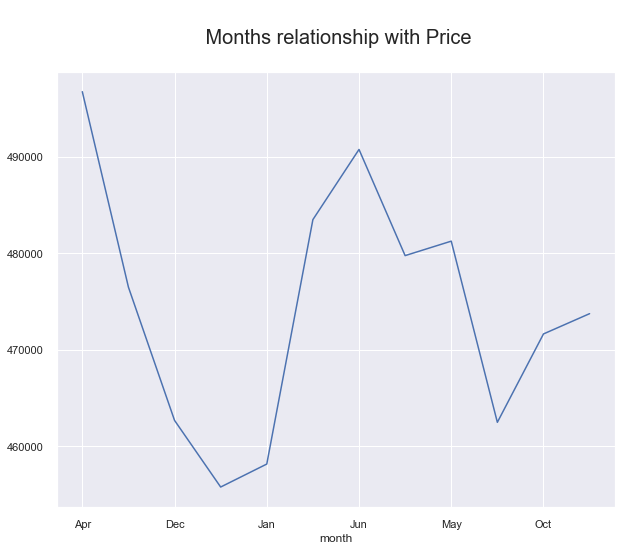

In [36]:
plt.figure(figsize= (10,8))
plt.title("\n Months relationship with Price\n",fontsize=20)
H_Sales.groupby('month').mean()['price'].plot()

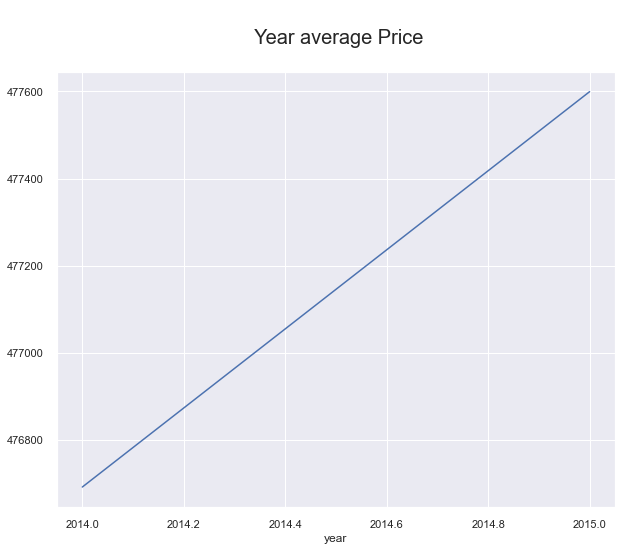

In [37]:
plt.figure(figsize= (10,8))
plt.title("\n Year average Price\n",fontsize=20)
H_Sales.groupby('year').mean()['price'].plot(kind='line')
plt.show()

In [38]:
H_Sales['yr_renovated'].value_counts()

0       19701
2014       82
2013       34
2000       30
2007       29
        ...  
1956        1
1948        1
1944        1
1934        1
1954        1
Name: yr_renovated, Length: 70, dtype: int64

In [39]:
H_Sales['renovated'] = H_Sales['yr_renovated'].apply(lambda yr : 0 if yr==0 else 1)

In [40]:
H_Sales['renovated'].value_counts()

0    19701
1      766
Name: renovated, dtype: int64

- 19,701 unrenovated houses against 766 refurbished buildings. The graph below indicates that renovated properties are pricey.

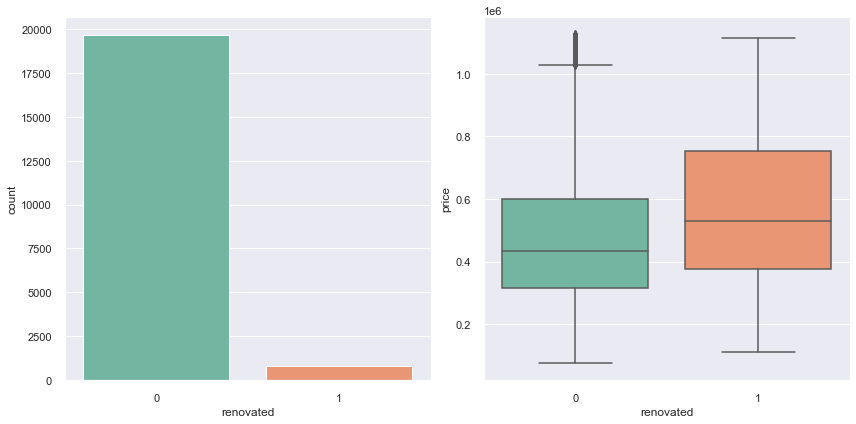

In [41]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

sns.countplot(x='renovated',data=H_Sales, palette='Set2',ax=axs[0])
sns.boxplot(y='price',x='renovated',data=H_Sales, palette='Set2', ax=axs[1])

plt.tight_layout()
plt.show()

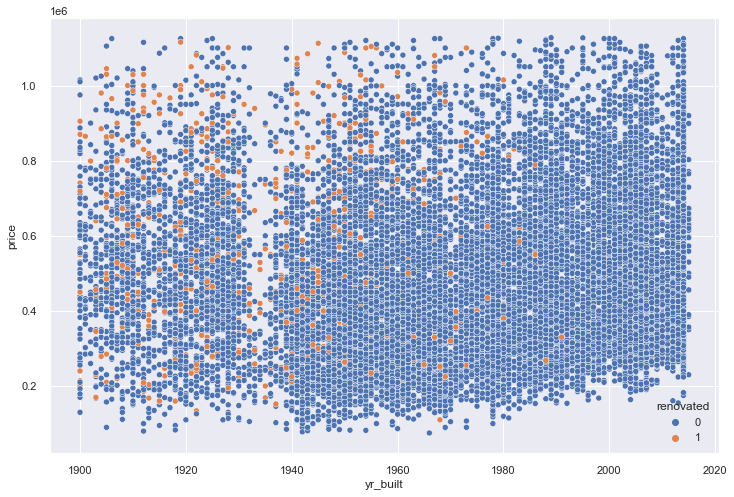

In [42]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='yr_built', y='price',hue='renovated' ,data=H_Sales)
plt.show()

### FEATURE ENGINEERING

### Linear Regression

#### Assumption
1. Linearrity:The relationship between  X and the mean y is linear
2. Normality: Normal distribution
3. Homoscedasticty: Variance of the residual is the same  for any value of X
4. independence: obsevartions are independent of each other

BEDROOMS BEDROOMS BEDROOMS BEDROOMS BEDROOMS 
Housing Data - Regression Analysis and Diagnostics for Price~bedrooms
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     1979.
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:34:32   Log-Likelihood:            -2.7876e+05
No. Observations:               20467   AIC:                         5.575e+05
Df Residuals:                   20465   BIC:                         5.575e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------

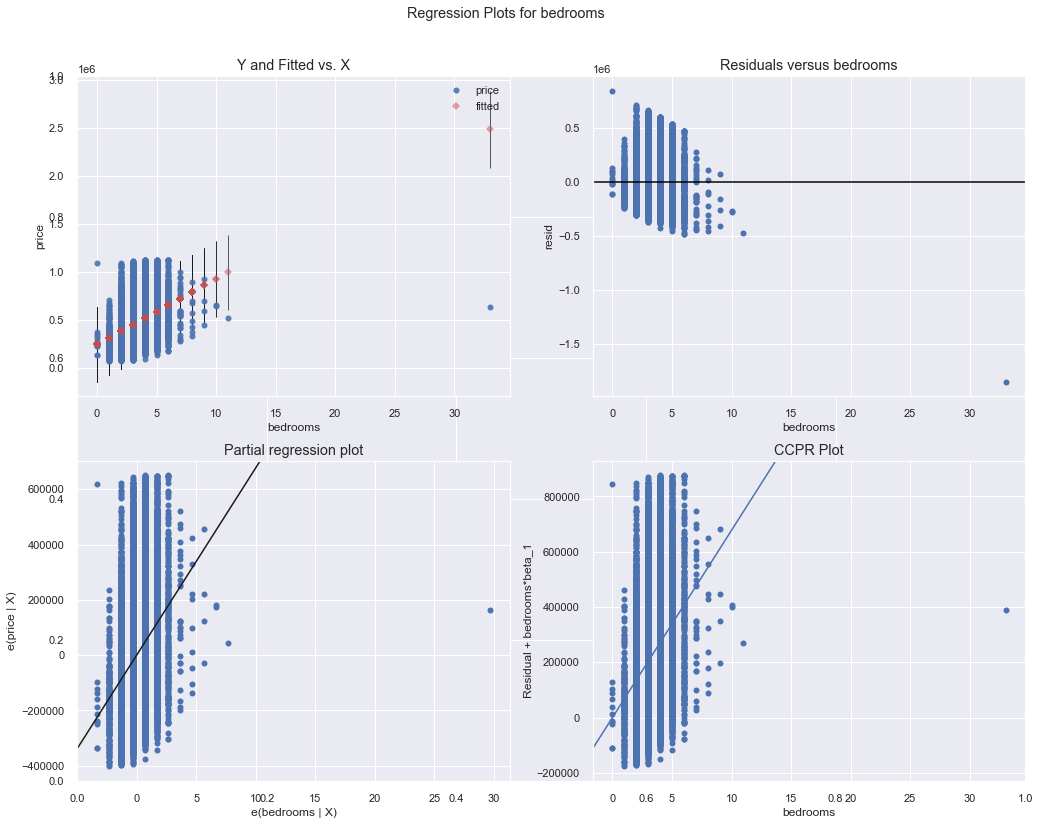

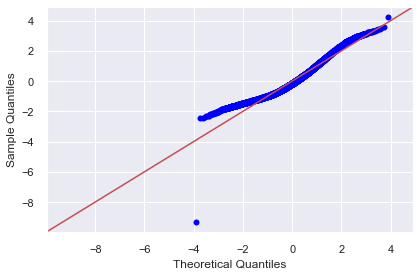

GRADE GRADE GRADE GRADE GRADE 
Housing Data - Regression Analysis and Diagnostics for Price~grade
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                 1.355e+04
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:34:36   Log-Likelihood:            -2.7450e+05
No. Observations:               20467   AIC:                         5.490e+05
Df Residuals:                   20465   BIC:                         5.490e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

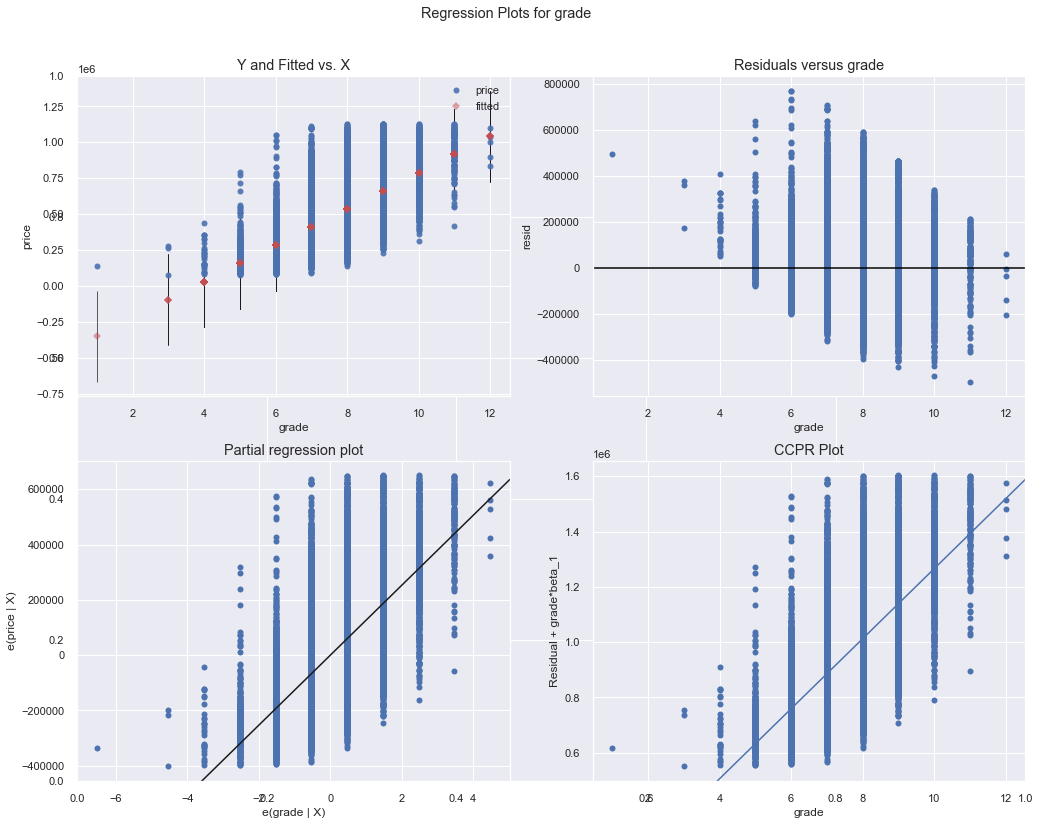

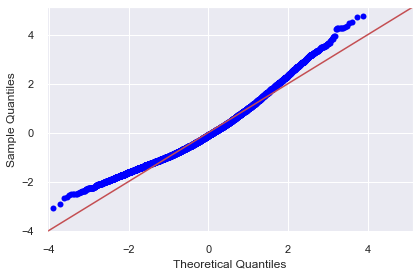

SQFT_LIVING SQFT_LIVING SQFT_LIVING SQFT_LIVING SQFT_LIVING 
Housing Data - Regression Analysis and Diagnostics for Price~sqft_living
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                 1.294e+04
Date:                Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:34:40   Log-Likelihood:            -2.7469e+05
No. Observations:               20467   AIC:                         5.494e+05
Df Residuals:                   20465   BIC:                         5.494e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.9

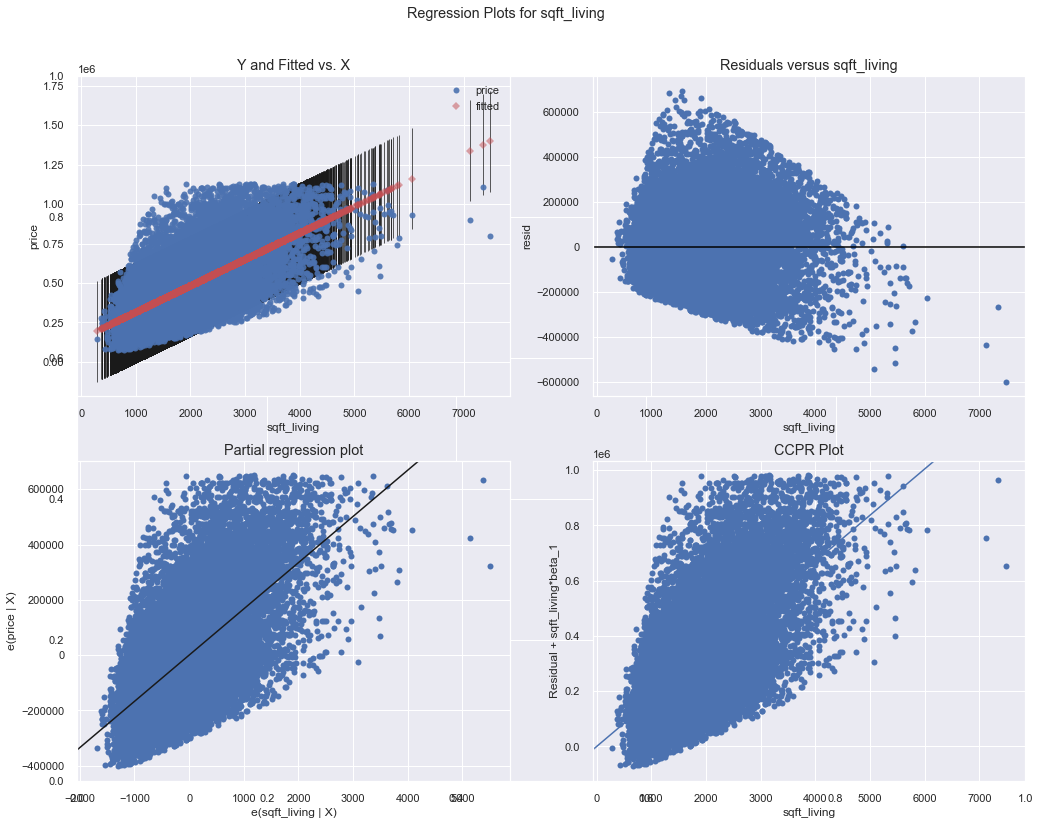

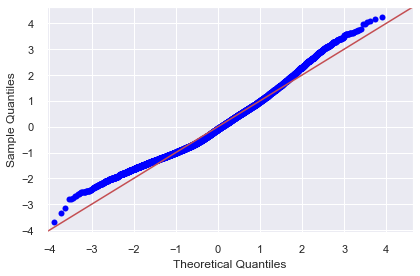

,ind_var,r_squared,intercept,slope,p-value,normality (JB)
0,bedrooms,0.08818,251287.56510,67781.95720,0.00000,1531.16254
2,sqft_living,0.38730,146354.71150,167.36022,0.00000,1060.29665
1,grade,0.39839,-476084.29202,126560.13302,0.00000,1696.15762


In [48]:
#Lets look at some regressions for all of my chosen columns

# import libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

# I don't need to see regression analysis for all of my variables
cols = [ 'bedrooms', 'grade','sqft_living',]

results = []
for idx, column in enumerate(cols):
    
    print((column.upper() + " ") * 5)
    print (f"Housing Data - Regression Analysis and Diagnostics for Price~{column}")
    
    f = f'price~{column}'  # create my model formula
    model = smf.ols(formula=f, data=H_Sales).fit()  # fit the model
    print(model.summary())
    
    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()
    
    results.append([column, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])

result_df = pd.DataFrame(results, columns=['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ])
result_df.sort_values(by='r_squared')

With the expection of the view, most of the r-squared values was below 0.05, the "view"had a r-squared value  of 0.15. The near zero p-value for all four variables shows it is extremely likely that the variables are correlated with price.

### Conclusion